# Trabajo Programación
## Víctor A. Gutiérrez Martínez

In [2]:
# Importamos las librerías que usaremos en el trabajo a priori:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Para el trabajo usaremos datos de alquileres de Airbnb en la ciudad de New York obtenidos de kaggle. 
### Se puede consultar toda la documentación en el siguiente enlace: www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

El trabajo trata de limpiar y analizar los datos de alquileres de Airbnb de la ciudad de New York para un momento del tiempo dado.
A lo largo del trabajo se irán mostrando diferentes comandos y ejemplos de las librerías pandas, numpy y matplotlib para demostrar el conocimiento aprendido sobre ellas. Así como alguna librería auxiliar si procede como podría ser sklearn para estimar modelos de aprendizaje automático.

### Carga y limpieza de los datos

In [6]:
# Cargamos el archivo csv y lo guardamos en un dataframe. Luego mostramos las 5 primeras filas
df = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


##### *Al cargar nos aparece un warning diciendo que las columnas tienen tipos mezclados

In [8]:
# Mostramos primero el encabezado de cada columna
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [9]:
# Con el método info podemos ver los valores no nulos (también los nulos si son menores que el rango del index) y el tipo de cada columna. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Observamos como las columnas tienen distintos tipos como nos decía el Warning. Además hay columnas con muchos valores nulos (license tiene solo 2 valores)

In [11]:
# Vamos a observar también algunos estadísticos básicos (solo de las columnas con tipos float o int):
df.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [12]:
# Contamos los nulos de cada columna y los ordenamos de más a menos nulos:
df.isnull().sum().sort_values(ascending = False)

license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
country                              532
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
country code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
id                                     0
host id         

Como observabamos anteriormente hay muchos valores nulos en algunas columnas como ["license", "house_rules","last review", "review per month"]

In [14]:
# Vamos a mostrar las columnas que tienen más de 300 registros nulos, para considerar si eliminar estas columnas de la muestra o no.
for columna in df.columns:
    nulos = df[columna].isnull().sum()
    porcentaje = nulos/len(df[columna])
    if nulos > 300:
        print(f"['{columna}'] tiene {df[columna].notnull().sum()} registros válidos y {nulos} nulos. En porcentaje: {porcentaje:6.3%}")

['host name'] tiene 102193 registros válidos y 406 nulos. En porcentaje: 0.396%
['country'] tiene 102067 registros válidos y 532 nulos. En porcentaje: 0.519%
['minimum nights'] tiene 102190 registros válidos y 409 nulos. En porcentaje: 0.399%
['last review'] tiene 86706 registros válidos y 15893 nulos. En porcentaje: 15.490%
['reviews per month'] tiene 86720 registros válidos y 15879 nulos. En porcentaje: 15.477%
['review rate number'] tiene 102273 registros válidos y 326 nulos. En porcentaje: 0.318%
['calculated host listings count'] tiene 102280 registros válidos y 319 nulos. En porcentaje: 0.311%
['availability 365'] tiene 102151 registros válidos y 448 nulos. En porcentaje: 0.437%
['house_rules'] tiene 50468 registros válidos y 52131 nulos. En porcentaje: 50.810%
['license'] tiene 2 registros válidos y 102597 nulos. En porcentaje: 99.998%


In [15]:
# Eliminamos las columnas license y house_rules:
df = df.drop(columns = ["license","house_rules"], axis = 1)

In [16]:
# También vamos a comprobar cuantos valores unicos tienen las columnas y ordenarlos de mayor a menor (Observamos como ya no aparecen license ni house_rules)
df.nunique().sort_values(ascending = False)

id                                102058
host id                           102057
NAME                               61281
lat                                21991
long                               17774
host name                          13190
last review                         2477
price                               1151
reviews per month                   1016
number of reviews                    476
availability 365                     438
service fee                          231
neighbourhood                        224
minimum nights                       153
calculated host listings count        78
Construction year                     20
neighbourhood group                    7
review rate number                     5
room type                              4
cancellation_policy                    3
instant_bookable                       2
host_identity_verified                 2
country code                           1
country                                1
dtype: int64

No necesariamente habría que eliminar las columnas que tengas pocos valores unicos ya que pueden ser las que aporten mucha información, sin embargo parece claro que country y country code van a ser de poca utilidad. Además, parece que hay valores id repetidos, ya que 102058 no coincide con 102599 valores que debería haber

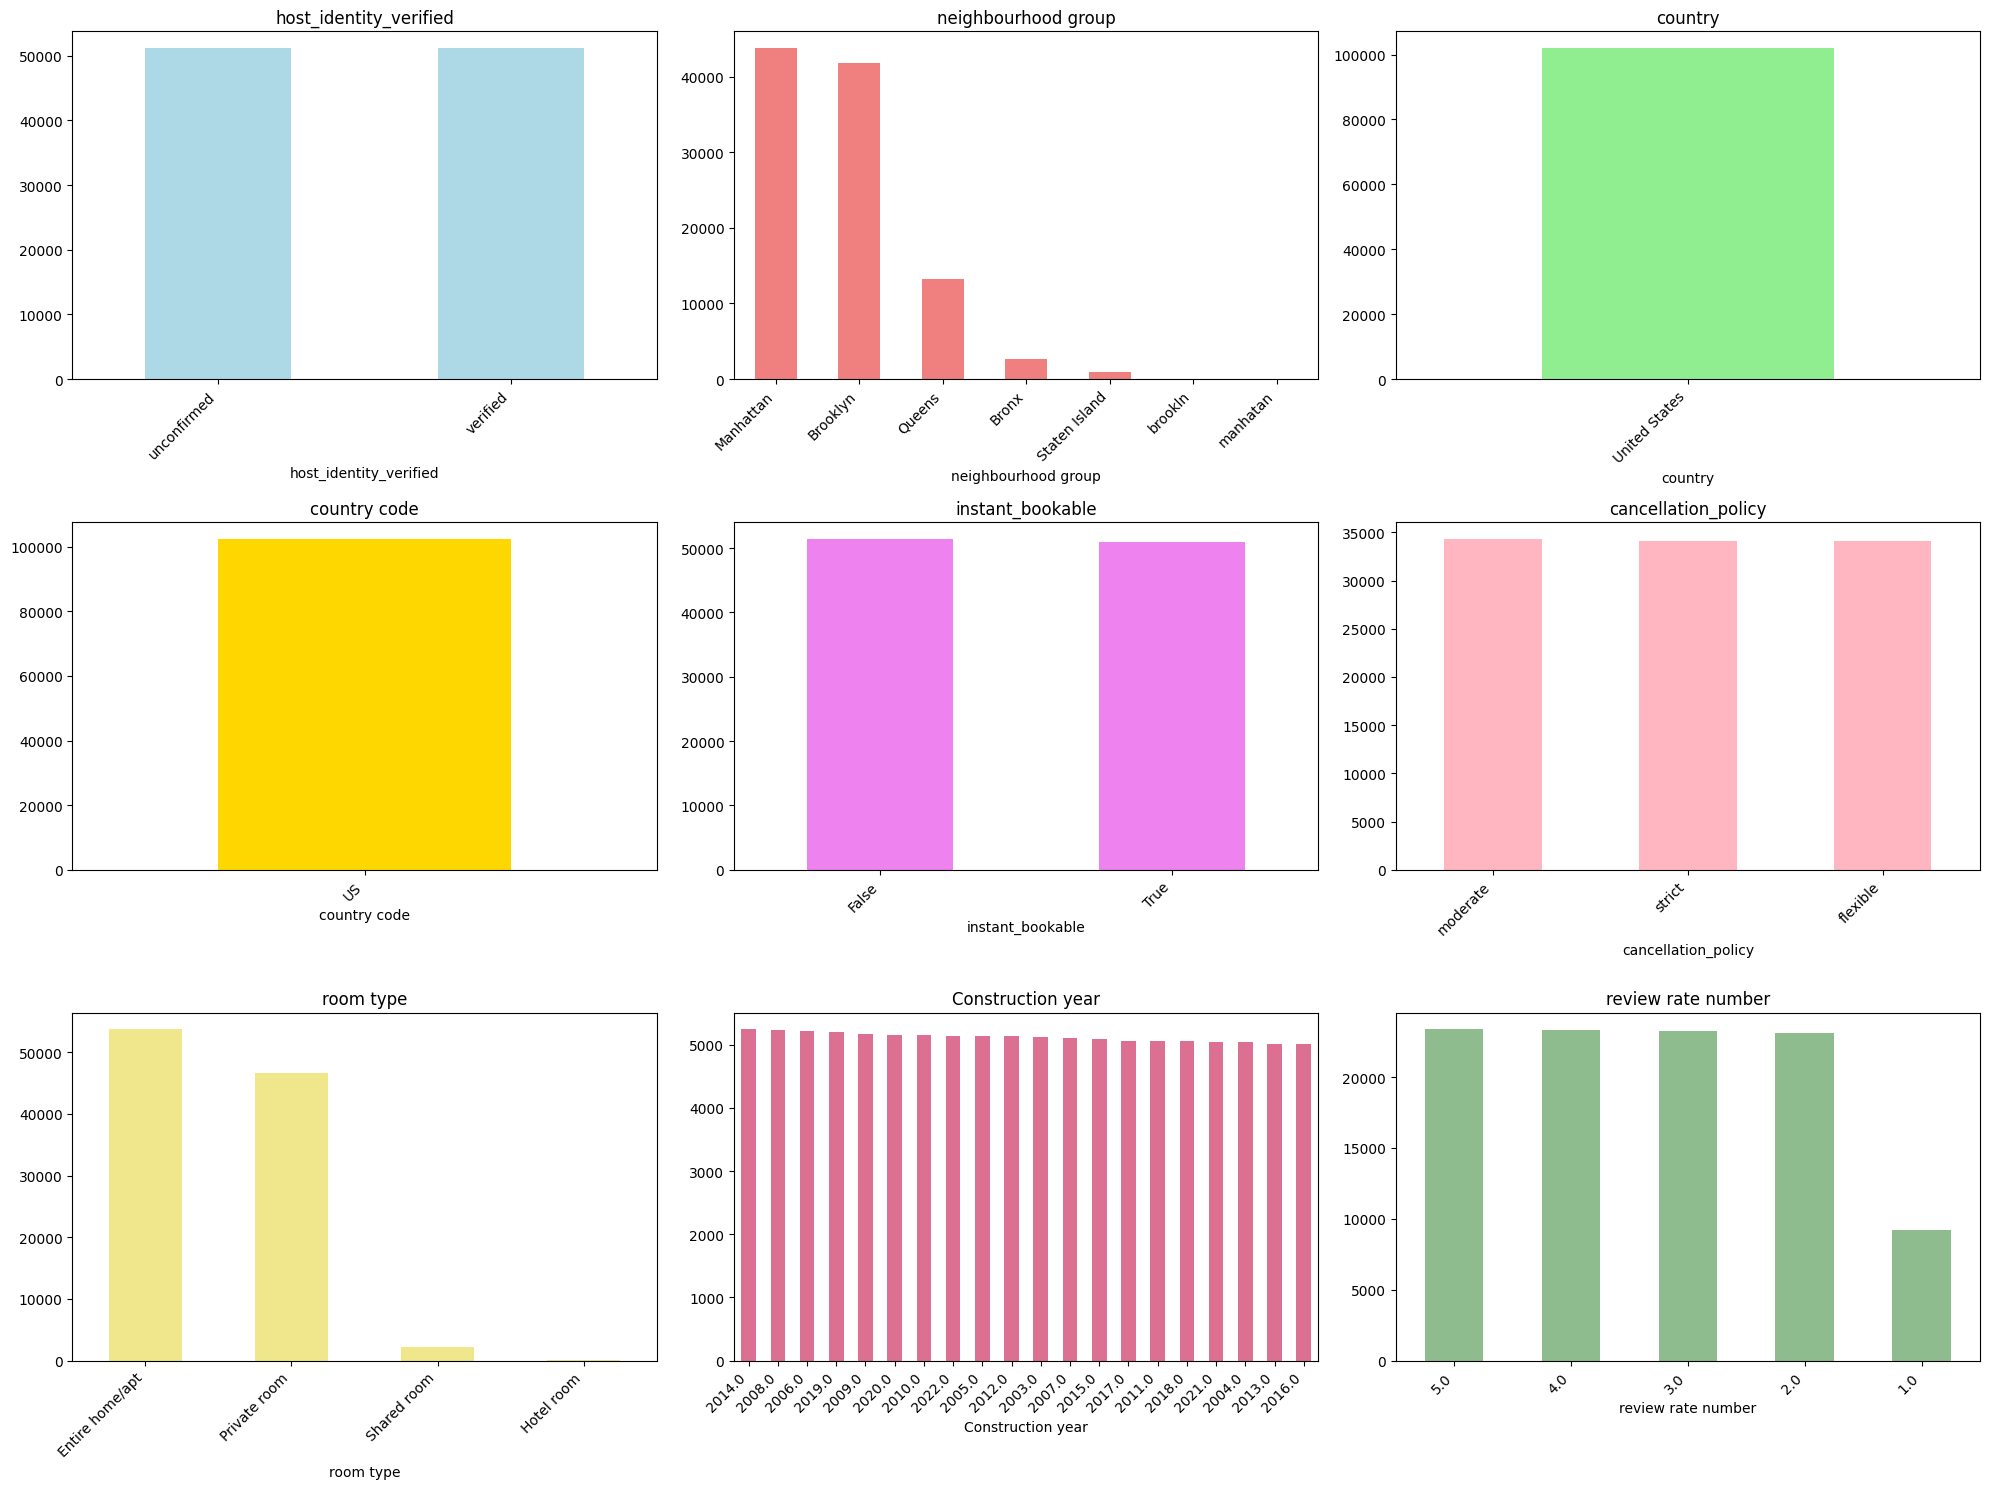

In [18]:
# Usamos matplotlib para representar la frecuencia de las columnas con 20 o menos valores unicos (9 columnas en total):

columnas = []
for col in df.columns:
    if df[col].nunique() <= 20:
        columnas.append(col)

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
colores = ['lightblue', 'lightcoral', 'lightgreen', 'gold', 'violet', 'lightpink', 'khaki', 'palevioletred', 'darkseagreen']

for i, col in enumerate(columnas):
    ax = axes[i]
    color = colores[i]
    df[col].value_counts().plot(kind='bar', ax=ax, color= color)
    ax.set_title(col)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()


Vemos que podríamos eliminar las columnas ['country'] y ['country code']. Además de comprobar algunos errores como etiquetas duplicadas en ['neighbourhood groups'] y tipos de datos incorrectos como vimos al principio

In [20]:
# Eliminamos las columnas country y country code
df = df.drop(columns = ["country","country code"], axis = 1)

In [21]:
# Observamos los valores duplicados:
df[df.duplicated(subset="id", keep=False)].sort_values(by='id')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,False,...,2008.0,$105,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0
102474,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,False,...,2008.0,$105,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0
102475,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,False,...,2008.0,$285,$57,30.0,6.0,1/31/2019,0.14,3.0,34.0,67.0
9099,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,False,...,2008.0,$285,$57,30.0,6.0,1/31/2019,0.14,3.0,34.0,67.0
9100,6027266,ACADIA Spacious 2 Bedroom Apt - Close to Hospi...,95854111798,verified,Juliana,Manhattan,Upper East Side,40.76021,-73.96157,False,...,2014.0,$586,$117,30.0,10.0,11/18/2018,0.22,5.0,34.0,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62657,35606797,Bright and Beautiful Top Floor Two Bedrooms,65331079885,unconfirmed,Frankie,Brooklyn,Carroll Gardens,40.68383,-73.99281,True,...,2009.0,"$1,027",$205,30.0,18.0,11/4/2021,0.63,2.0,1.0,3.0
102240,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,True,...,2015.0,$141,$28,30.0,1.0,11/4/2021,0.25,3.0,4.0,307.0
62658,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,True,...,2015.0,$141,$28,30.0,1.0,11/4/2021,0.25,3.0,4.0,307.0
102241,35607902,Modern NEW Room|PRIVATE BATHROOM,7431680152,verified,Dariia & Jacob,Brooklyn,Bedford-Stuyvesant,40.68990,-73.94074,True,...,2008.0,$284,$57,30.0,1.0,11/4/2021,0.25,2.0,10.0,365.0


Podemos ver que los registros que tienen el mismo id estan replicados por lo tanto tendremos que eliminarlos. Además, ahora ya podríamos asociar la columna id como indice.

In [23]:
# Nos quedamos solo con una instancia de los duplicados
df = df.drop_duplicates(subset=['id'], keep='first')

In [24]:
# Hacemos que la columna 'id' pase a ser el indice del dataframe
df = df.set_index('id')
df.head(5)

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
id,,,,,,,,,,,,,,,,,,,,,
1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0


In [25]:
# Reemplazamos los registros donde aparece "brookln" por "Brooklyn" y "manhatan" por "Manhattan"
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', nan, 'Staten Island', 'Bronx'],
      dtype=object)

Observamos como ahora ya no hay fallos en las categorías de "neighbourhood group"

In [27]:
# Como sabemos que los que tienen pocos valores únicos son categorías cambiamos los tipos a "category" y los booleanos a bool:
df['neighbourhood group'] = df['neighbourhood group'].astype('category')
df['cancellation_policy'] = df['cancellation_policy'].astype('category')
df['room type'] = df['room type'].astype('category')
df['host_identity_verified'] = df['host_identity_verified'].astype('category')
df['review rate number'] = df['review rate number'].astype('category')
df['instant_bookable'] = df['instant_bookable'].astype('bool')

#Además de poner "construction year" como fecha
df['Construction year'] = pd.to_datetime(df['Construction year'], format='%Y', errors='coerce')

# Observamos los cambios
df.dtypes


NAME                                      object
host id                                    int64
host_identity_verified                  category
host name                                 object
neighbourhood group                     category
neighbourhood                             object
lat                                      float64
long                                     float64
instant_bookable                            bool
cancellation_policy                     category
room type                               category
Construction year                 datetime64[ns]
price                                     object
service fee                               object
minimum nights                           float64
number of reviews                        float64
last review                               object
reviews per month                        float64
review rate number                      category
calculated host listings count           float64
availability 365    

In [28]:
# Observamos que columnas "price" y "service fee" tienen un simbolo de dolar en los registros
df[['price','service fee']].head()

,price,service fee
id,,
1001254,$966,$193
1002102,$142,$28
1002403,$620,$124
1002755,$368,$74
1003689,$204,$41


In [29]:
# Quitamos el simbolo de dollar de ambas columnas y le cambiamos el tipo
for col in ['price','service fee']:
    df[col] = df[col].str.replace('$', '', regex=False)  # Quitamos el dolar
    df[col] = df[col].str.replace(',', '', regex=False)  # Quitamos las comas de los miles
    df[col] = df[col].astype(float)

df.dtypes

NAME                                      object
host id                                    int64
host_identity_verified                  category
host name                                 object
neighbourhood group                     category
neighbourhood                             object
lat                                      float64
long                                     float64
instant_bookable                            bool
cancellation_policy                     category
room type                               category
Construction year                 datetime64[ns]
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                               object
reviews per month                        float64
review rate number                      category
calculated host listings count           float64
availability 365    

In [30]:
# Ahora si podemos ver los estadisticos de "price" y "service fee"
df[['price','service fee']].describe()

,price,service fee
count,101811.000000,101785.000000
mean,625.355580,125.039249
std,331.672649,66.325905
min,50.000000,10.000000
25%,340.000000,68.000000
50%,625.000000,125.000000
75%,913.000000,183.000000
max,1200.000000,240.000000


Ahora que ya tenemos la mayoría de columnas clasificadas es hora de volver a mirar los valores nulos a ver que podemos hacer con ellos

** Normalmente los miraríamos de más valores nulos a menos, pero el trabajo es para demostrar distintas técnicas.

In [32]:
df.isnull().sum().sort_values()

room type                             0
host id                               0
instant_bookable                      0
lat                                   8
long                                  8
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
number of reviews                   183
Construction year                   214
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
review rate number                  319
calculated host listings count      319
minimum nights                      400
host name                           404
availability 365                    448
reviews per month                 15818
last review                       15832
dtype: int64

In [33]:
# Mostramos las instancias que no tienen lat y long:
noloc = df[df['lat'].isnull() & df['long'].isnull()]
noloc

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
id,,,,,,,,,,,,,,,,,,,,,
1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,NaN,NaN,False,strict,...,NaT,539.0,108.0,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0
1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,NaN,NaN,False,strict,...,2021-01-01,1058.0,212.0,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0
1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,False,flexible,...,2010-01-01,506.0,101.0,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0
1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,True,strict,...,2003-01-01,381.0,76.0,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0
1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,True,strict,...,2005-01-01,224.0,45.0,1.0,63.0,5/18/2019,0.89,3.0,2.0,70.0
1490122,Cute Room in Historic Loft!,42267829819,unconfirmed,Jones,Brooklyn,Greenpoint,NaN,NaN,True,flexible,...,2019-01-01,524.0,105.0,14.0,22.0,5/2/2019,0.25,1.0,1.0,266.0
1512766,21 day Chelsea Apartment rental,10876728736,unconfirmed,Owens,Manhattan,Flatiron District,NaN,NaN,False,strict,...,2020-01-01,623.0,125.0,21.0,0.0,NaN,NaN,2.0,1.0,104.0
1545904,New York City for All Seasons!,26437872336,unconfirmed,Douglas,Manhattan,Upper West Side,NaN,NaN,True,flexible,...,2014-01-01,413.0,83.0,1.0,25.0,6/22/2013,0.28,2.0,1.0,259.0


Podemos observar que son las mismas 8 las que faltan en ambas. Podemos eliminarlas de la muestra (las tenemos guardas en 'noloc' en caso de querer recuperarlas)

In [35]:
# Eliminamos los datos sin lat ni long
df.dropna(subset=['lat', 'long'],inplace=True)
df.isnull().sum().sort_values()

room type                             0
host id                               0
lat                                   0
long                                  0
instant_bookable                      0
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
number of reviews                   183
Construction year                   213
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
review rate number                  319
calculated host listings count      319
minimum nights                      400
host name                           404
availability 365                    448
reviews per month                 15817
last review                       15831
dtype: int64

Como tenemos la lat y long de todos los datos faltantes podríamos conocer los datos faltantes de "neighbourhood" y "neighbourhood group".

**Normalmente los eliminariamos porque son muy pocos en comparación al número total de instancias pero el trabajo es para demostrar distintas técnicas.

In [37]:
# Creamos un dataframe con los datos no nulos agrupados por "neighbourhood" donde incluimos el minimo, máximo y media de la lat y long de cada barrio.
# También añadimos el número de instancias que tenemos de cada barrio.
ngroup_stats = df[df["neighbourhood group"].notnull()].groupby('neighbourhood group').agg(
    min_lat=('lat', 'min'),
    max_lat=('lat', 'max'),
    avg_lat = ('lat','mean'),
    min_long=('long', 'min'),
    max_long=('long', 'max'),
    avg_long = ('long','mean'),
    num=('lat', 'count')
)

ngroup_stats.sort_values(by='num', ascending=False)

C:\Users\v-gut\AppData\Local\Temp\ipykernel_24504\3825182060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ngroup_stats = df[df["neighbourhood group"].notnull()].groupby('neighbourhood group').agg(


,min_lat,max_lat,avg_lat,min_long,max_long,avg_long,num
neighbourhood group,,,,,,,
Manhattan,40.70234,40.87821,40.765299,-74.01851,-73.90855,-73.974403,43554
Brooklyn,40.57115,40.73890,40.683825,-74.03969,-73.85676,-73.950494,41628
Queens,40.56546,40.79721,40.728578,-73.95953,-73.70522,-73.867682,13196
Bronx,40.80011,40.91697,40.849258,-73.93296,-73.78158,-73.883298,2694
Staten Island,40.49979,40.64816,40.611709,-74.24984,-74.06092,-74.105139,949


In [38]:
# Creamos un conjunto de los datos con valor nan en "neighbourhood group"
ngroup_nan = df[['lat','long']][df['neighbourhood group'].isnull()]
ngroup_nan.head()

,lat,long
id,,
1042206,40.83139,-73.94095
1042759,40.68346,-73.96374
1043311,40.72828,-73.98801
1043863,40.76865,-73.95058
1044415,40.75038,-73.90334


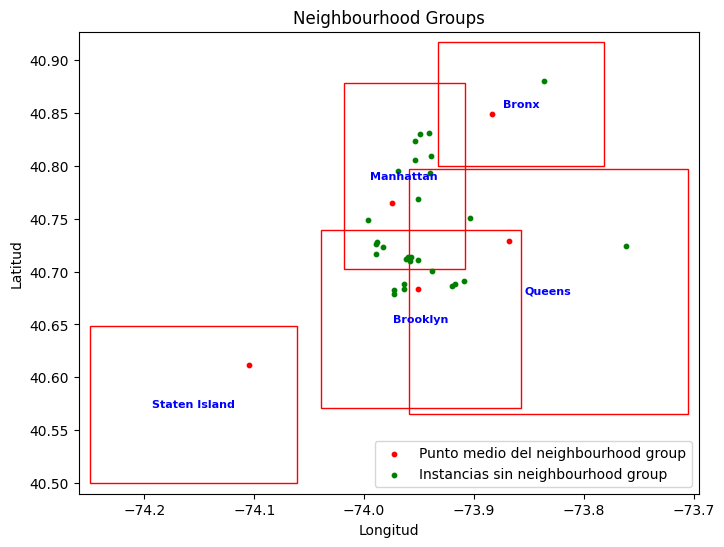

In [39]:
# Vamos a crear un gráfico dibujando un rectángulo por cada 'neighbourhood group' usando las coordenadas min y máx de lat y long.
# También representaremos el punto medio de cada 'neighbourhood group' en rojo y la lat y long de los valores con 'neighbourhood group' nulo

fig, ax = plt.subplots(figsize=(8, 6))

# Iteramos dibujando un rectángulo por cada grupo
for index, row in ngroup_stats.iterrows():
    min_lat, max_lat = row['min_lat'], row['max_lat']
    min_long, max_long = row['min_long'], row['max_long']
    rect = plt.Rectangle((min_long, min_lat), max_long - min_long, max_lat - min_lat, linewidth=1, edgecolor='r', facecolor='none')
    # Anotamos la categoría de "Neighbourhood group" en el medio de cada rectángulo
    ax.add_patch(rect)
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    plt.annotate(index, (cx, cy), color='b', weight='bold', fontsize=8, ha='center', va='center')

# Dibujamos los puntos medios en rojo
plt.scatter(ngroup_stats['avg_long'], ngroup_stats['avg_lat'], color='red', label='Punto medio del neighbourhood group', s=10)
# Dibujamos las instancias sin grupo en verde
plt.scatter(ngroup_nan['long'], ngroup_nan['lat'], color='green', label='Instancias sin neighbourhood group', s=10)

plt.title('Neighbourhood Groups')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.xlim(ngroup_stats['min_long'].min() - 0.01, ngroup_stats['max_long'].max() + 0.01)
plt.ylim(ngroup_stats['min_lat'].min() - 0.01, ngroup_stats['max_lat'].max() + 0.01)
plt.legend()
plt.show()

Con la gráfica no parece quedar claro a qué 'neighbourhood group' pertenecen los valores nulos, ya que se solapan los grupos.
Posiblemente esto se deba a que no tengan forma rectangular, probaremos otra forma de representarlos

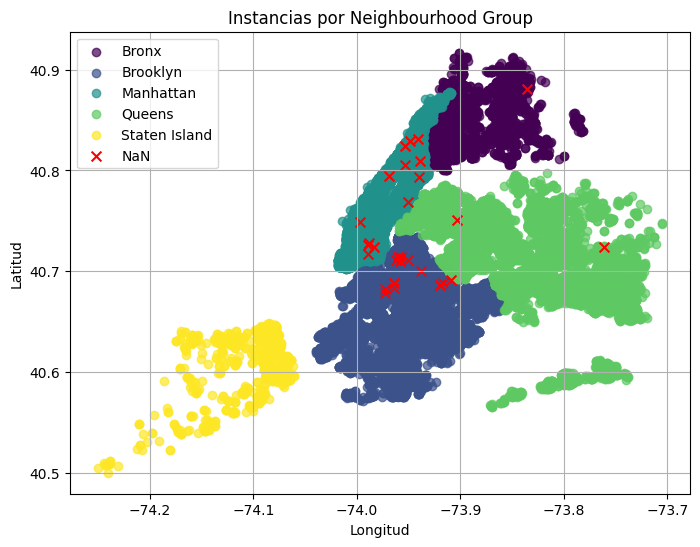

In [41]:
# Probamos dibujando todas las instancias por sus coordenadas de lat y long pero dandoles distintos colores segun su 'neighbourhood group'.
# También mostramos los valores NaN como cruces en el mapa 

plt.figure(figsize=(8, 6))

# Tomamos las categorias y les damos un color a cada una
neighbourhood_groups = ngroup_stats.index
colors = plt.get_cmap('viridis', len(neighbourhood_groups))
color_dict = {key: colors(i) for i, key in enumerate(neighbourhood_groups)}


# Iteramos dibujando los puntos de cada grupo usando un color diferente en cada grupo
for group in neighbourhood_groups:
    subset = df[df['neighbourhood group'] == group]
    plt.scatter(subset['long'], subset['lat'], label=group, color=color_dict[group], alpha=0.7)

# Añadimos los puntos NaN con una cruz roja
plt.scatter(ngroup_nan['long'], ngroup_nan['lat'], marker='x', color='red', label='NaN', s=50)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Instancias por Neighbourhood Group')
plt.legend()
plt.grid(True)
plt.show()

Este mapa funciona mucho mejor para ver a que "neighbourhood group" pueden pertenecer los valores NaN.
Se observa mucho mejor que los valores nulos podrían ubicarse en los "neighbourhood group" existentes segun su lat y long

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Guardamos el df de los no nulos
df_no_nulls = df.dropna(subset=['neighbourhood group'])

# Seleccionamos las columnas para el modelo
X = df_no_nulls[['lat', 'long']]
y = df_no_nulls['neighbourhood group']

# Creamos el modelo QDA
qda_model = QuadraticDiscriminantAnalysis()

# Implementamos 10-Fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(qda_model, X, y, cv=cv, scoring='accuracy')

# Mostramos el accuracy medio para evaluar el modelo con 10-Fold
print("accuracy medio de los 10-Fold:", np.mean(scores))

# Entrenamos el modelo final con todos los datos
qda_model.fit(X, y)

# Añadimos a ngroup_nan (subconjunto de df de valores con neighbourhood group nulo) las predicciones como "neighbourhood group"
ngroup_nan['neighbourhood group'] = qda_model.predict(ngroup_nan[['lat', 'long']])

ngroup_nan[['lat', 'long', 'neighbourhood group']]

accuracy medio de los 10-Fold: 0.9676733261661437


,lat,long,neighbourhood group
id,,,
1042206,40.83139,-73.94095,Manhattan
1042759,40.68346,-73.96374,Brooklyn
1043311,40.72828,-73.98801,Manhattan
1043863,40.76865,-73.95058,Manhattan
1044415,40.75038,-73.90334,Queens
1051043,40.71156,-73.96218,Brooklyn
1051595,40.70032,-73.93830,Brooklyn
1052148,40.68233,-73.97261,Brooklyn
1083076,40.72354,-73.98295,Manhattan


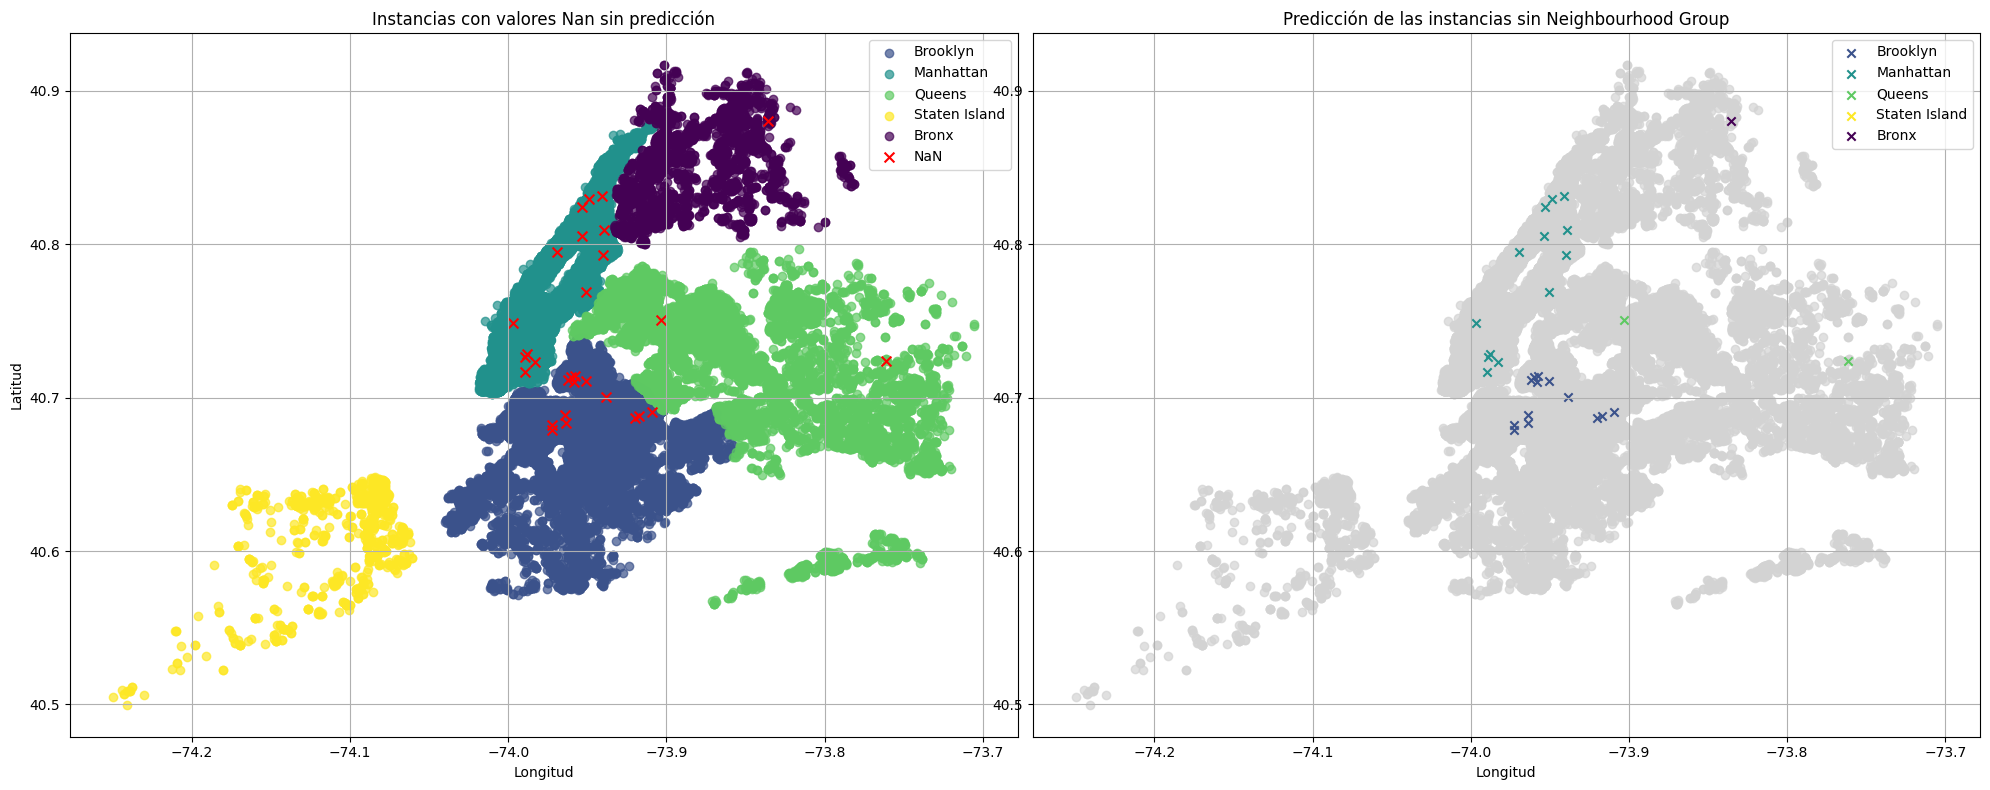

In [44]:
# Vamos a representar las predicciones que hemos hecho con QDA a ver si parecen coincidir con nuestro dataset mediante dos gráficas,
# la de la izquierda es la gráfica que teniamos en celdas anteriores y a la derecha son las predicciones con sus colores correspondientes
# a cada grupo y el resto de puntos sombreandos de gris.

neighbourhood_groups = df_no_nulls['neighbourhood group'].unique() # Mejor referimos los grupos al df que usamos para predecir

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
# Dibujamos la gráfica de la izquierda igual que antes
for group in neighbourhood_groups:
    subset = df[df['neighbourhood group'] == group]
    plt.scatter(subset['long'], subset['lat'], label=group, color=color_dict[group], alpha=0.7)

plt.scatter(ngroup_nan['long'], ngroup_nan['lat'], marker='x', color='red', label='NaN', s=50)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Instancias con valores Nan sin predicción')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(1,2,2)

plt.scatter(df_no_nulls['long'], df_no_nulls['lat'], color='lightgray', alpha=0.7) # La silueta del mapa en gris

# Dibujamos los puntos predichos por QDA:
for group in neighbourhood_groups:
    subset = ngroup_nan[ngroup_nan['neighbourhood group'] == group]
    plt.scatter(subset['long'], subset['lat'],marker='x', label=group, color=color_dict[group], alpha=1)

plt.xlabel('Longitud')
plt.title('Predicción de las instancias sin Neighbourhood Group')
plt.legend()
plt.grid(True)

plt.show()

Ahora que hemos podido predecir a que "neighbourhood group" pertenecen los datos nulos vamos a crear un nuevo dataframe que agrupe estas predicciones junto a las otras. (Mantendremos intacto el df original)

In [46]:
# Creamos el nuevo dataframe 
airbnb = df.copy()
airbnb['neighbourhood group'] = airbnb['neighbourhood group'].fillna(ngroup_nan['neighbourhood group'])

airbnb.isnull().sum().sort_values()

room type                             0
host id                               0
neighbourhood group                   0
lat                                   0
long                                  0
instant_bookable                      0
neighbourhood                        16
cancellation_policy                  76
number of reviews                   183
Construction year                   213
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
review rate number                  319
calculated host listings count      319
minimum nights                      400
host name                           404
availability 365                    448
reviews per month                 15817
last review                       15831
dtype: int64

Observamos que "neighbourhood group" ya no tiene valores nulos. Ahora vamos con los "neighbourhood" pero probaremos desde otro enfoque

In [48]:
# Vamos a observar si por los nombres podemos encontrar algun barrio que esté escrito incorrectamente
barrios_nonull = df[df["neighbourhood"].notnull()]
sorted(barrios_nonull["neighbourhood"].unique())

['Allerton',
 'Arden Heights',
 'Arrochar',
 'Arverne',
 'Astoria',
 'Bath Beach',
 'Battery Park City',
 'Bay Ridge',
 'Bay Terrace',
 'Bay Terrace, Staten Island',
 'Baychester',
 'Bayside',
 'Bayswater',
 'Bedford-Stuyvesant',
 'Belle Harbor',
 'Bellerose',
 'Belmont',
 'Bensonhurst',
 'Bergen Beach',
 'Boerum Hill',
 'Borough Park',
 'Breezy Point',
 'Briarwood',
 'Brighton Beach',
 'Bronxdale',
 'Brooklyn Heights',
 'Brownsville',
 "Bull's Head",
 'Bushwick',
 'Cambria Heights',
 'Canarsie',
 'Carroll Gardens',
 'Castle Hill',
 'Castleton Corners',
 'Chelsea',
 'Chelsea, Staten Island',
 'Chinatown',
 'City Island',
 'Civic Center',
 'Claremont Village',
 'Clason Point',
 'Clifton',
 'Clinton Hill',
 'Co-op City',
 'Cobble Hill',
 'College Point',
 'Columbia St',
 'Concord',
 'Concourse',
 'Concourse Village',
 'Coney Island',
 'Corona',
 'Crown Heights',
 'Cypress Hills',
 'DUMBO',
 'Ditmars Steinway',
 'Dongan Hills',
 'Douglaston',
 'Downtown Brooklyn',
 'Dyker Heights',
 'East

In [49]:
# Filtramos los "neighbourhood" por "neighbourhood group" 
barrio_grupo = airbnb.groupby(['neighbourhood', 'neighbourhood group'], observed = True).size().unstack(fill_value=0)
barrio_grupo

neighbourhood group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
neighbourhood,,,,,
Allerton,96,0,0,0,0
Arden Heights,0,0,0,0,9
Arrochar,0,0,0,0,51
Arverne,0,0,0,219,0
Astoria,0,0,0,1868,0
...,...,...,...,...,...
Windsor Terrace,0,331,0,0,0
Woodhaven,0,0,0,190,0
Woodlawn,29,0,0,0,0


In [50]:
# Vamos a contar en cuantas columnas aparece cada "neighbourhood" para comprobar que no haya consistencia
# (cada neighbourhood solo debería corresponder a un neighbourhood group)
barrio_grupo.gt(0).sum(axis=1).sort_values()

neighbourhood
Allerton          1
Neponsit          1
New Brighton      1
New Dorp          1
New Dorp Beach    1
                 ..
Fordham           1
Forest Hills      1
Fort Greene       1
Woodrow           1
Woodside          1
Length: 224, dtype: int64

Los datos parecen estar correctos, ya que cada "neighbourhood" solo tiene un grupo.

In [52]:
# Al igual que con los grupos, creamos un dataframe con los datos no nulos agrupados por "neighbourhood" donde incluimos los percentiles 15, 85
# y media de la lat y long de cada barrio.También añadimos el número de instancias que tenemos de cada barrio y el barrio al que pertenecen.
neighbourhood_stats = airbnb.groupby('neighbourhood').agg(
    p15_lat=('lat', lambda x: x.quantile(0.15)),  # Percentil 15 de latitud (mejor que el mínimo para que no se solapen tanto)
    p85_lat=('lat', lambda x: x.quantile(0.85)),  # Percentil 85 de latitud (mejor que el máximo para que no se solapen tanto)
    avg_lat=('lat', 'mean'),
    p15_long=('long', lambda x: x.quantile(0.15)),  # Percentil 15 de longitud (mejor que el mínimo para que no se solapen tanto)
    p85_long=('long', lambda x: x.quantile(0.85)),  # Percentil 85 de longitud (mejor que el máximo para que no se solapen tanto)
    avg_long = ('long','mean'),
    num=('lat', 'count'),
    group=('neighbourhood group','first') # Le pasamos la primera ocurrencia ya que hemos visto antes que no da problemas
)

neighbourhood_stats.sort_values(by='num', ascending=False)

,p15_lat,p85_lat,avg_lat,p15_long,p85_long,avg_long,num,group
neighbourhood,,,,,,,,
Bedford-Stuyvesant,40.681450,40.693140,40.687150,-73.954014,-73.924470,-73.939505,7898,Brooklyn
Williamsburg,40.707697,40.717600,40.712533,-73.962300,-73.941560,-73.951870,7732,Brooklyn
Harlem,40.804950,40.826070,40.815871,-73.954260,-73.941740,-73.947936,5441,Manhattan
Bushwick,40.688955,40.702760,40.696421,-73.929330,-73.910090,-73.920179,4956,Brooklyn
Hell's Kitchen,40.756980,40.765900,40.761899,-73.996126,-73.987430,-73.991673,3949,Manhattan
...,...,...,...,...,...,...,...,...
Lighthouse Hill,40.576410,40.576949,40.576667,-74.136660,-74.129310,-74.132810,3,Staten Island
Woodrow,40.538091,40.538840,40.538483,-74.204196,-74.198260,-74.201087,3,Staten Island
Fort Wadsworth,40.595460,40.595460,40.595460,-74.060920,-74.060920,-74.060920,2,Staten Island


Vemos que el problema puede estar en que hay barrios con una sola instancia o muy pocas

<Axes: xlabel='neighbourhood'>

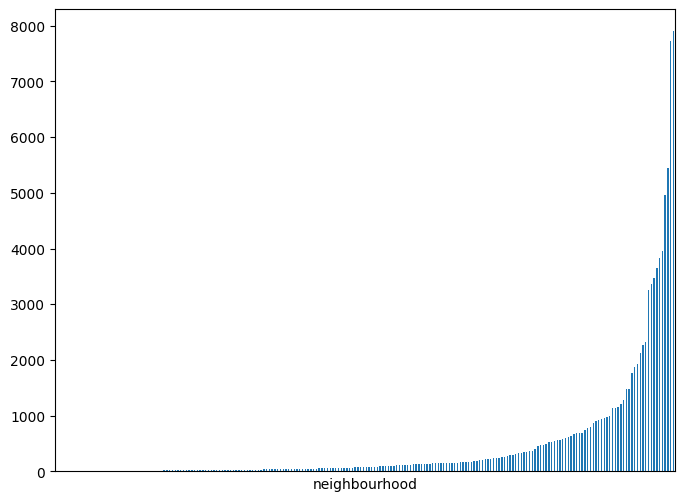

In [54]:
# Hacemos una visualización simple (sin usar matplotlib) para ver como está distribuido el número de instancias por "neighbourhood"
neighbourhood_stats['num'].sort_values().plot(kind='bar', figsize=(8, 6), xticks=[])

In [55]:
neighbourhood_stats['num'].describe()

count     224.000000
mean      455.508929
std      1081.403850
min         1.000000
25%        23.750000
50%        77.000000
75%       332.000000
max      7898.000000
Name: num, dtype: float64

Como vemos, la distribucion de las instancias que hay por barrio es muy dispar, teniendo el 25% de los barrios de la muestra menos de 24 instancias.

In [57]:
# Creamos un data frame con las instancias nulas
neighbourhood_nan = df[['lat','long','neighbourhood group']][df['neighbourhood'].isnull()]
neighbourhood_nan

,lat,long,neighbourhood group
id,,,
1286875,40.71580,-73.95803,Brooklyn
1303444,40.73089,-73.98195,Manhattan
1306758,40.71300,-73.99752,Manhattan
1318909,40.79816,-73.96190,Manhattan
1326641,40.68012,-73.97847,Brooklyn
1339896,40.72709,-73.98274,Manhattan
1345971,40.75348,-73.97065,Manhattan
1350942,40.71693,-73.98948,Manhattan
1356465,40.68016,-73.94878,Brooklyn


Observamos que los valores nulos solo pertenecen a los grupos Manhattan y Brooklyn, lo que nos puede ayudar luego.

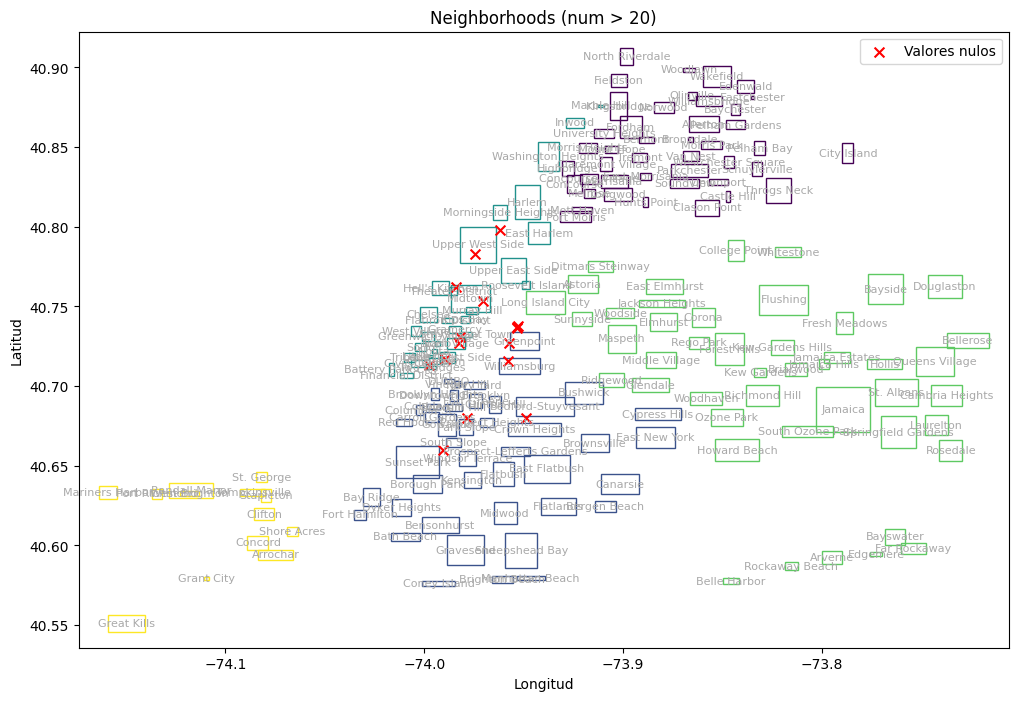

In [59]:
# Vamos a hacer primero un gráfico por rectángulos como hicimos en "neighbourhood group" pero filtrando para los "neighbourhood" con más de 20 instancias

nh_20 = neighbourhood_stats[neighbourhood_stats['num'] > 20]
fig, ax = plt.subplots(figsize=(12, 8))


for index, row in nh_20.iterrows():
    min_lat, max_lat = row['p15_lat'], row['p85_lat']
    min_long, max_long = row['p15_long'], row['p85_long']

    # Dibujamos los rectángulos con distinto color según su grupo aprovechando el diccionario que creamos en celdas anteriores
    rect = plt.Rectangle((min_long, min_lat), max_long - min_long, max_lat - min_lat, 
                         linewidth=1, edgecolor=color_dict[row['group']], facecolor="none") 
    ax.add_patch(rect)
    
    # Añadimos el texto en el centro de cada rectángulo, aunque se verán mal al ser demasiados
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    ax.annotate(index, (cx, cy), color='darkgrey', fontsize=8, ha='center', va='center')

# Añadimos los valores nulos como cruces rojas
plt.scatter(neighbourhood_nan['long'], neighbourhood_nan['lat'], marker='x', color='red', label='Valores nulos', s=50)

ax.set_title('Neighborhoods (num > 20)')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.xlim(nh_20['p15_long'].min() - 0.01, nh_20['p85_long'].max() + 0.01)
plt.ylim(nh_20['p15_lat'].min() - 0.01, nh_20['p85_lat'].max() + 0.01)
plt.legend()
plt.show()

Aunque usar los percentiles ha sido buena idea para reducir el tamaño de los rectángulos, al haber demasiados barrios es imposible de distinguir a simple vista a que barrio podrían pertenecer los valores nulos. Aunque sí sabemos que sus grupos están en Manhattan o Brooklyn lo que podría servir para acotar la búsqueda.

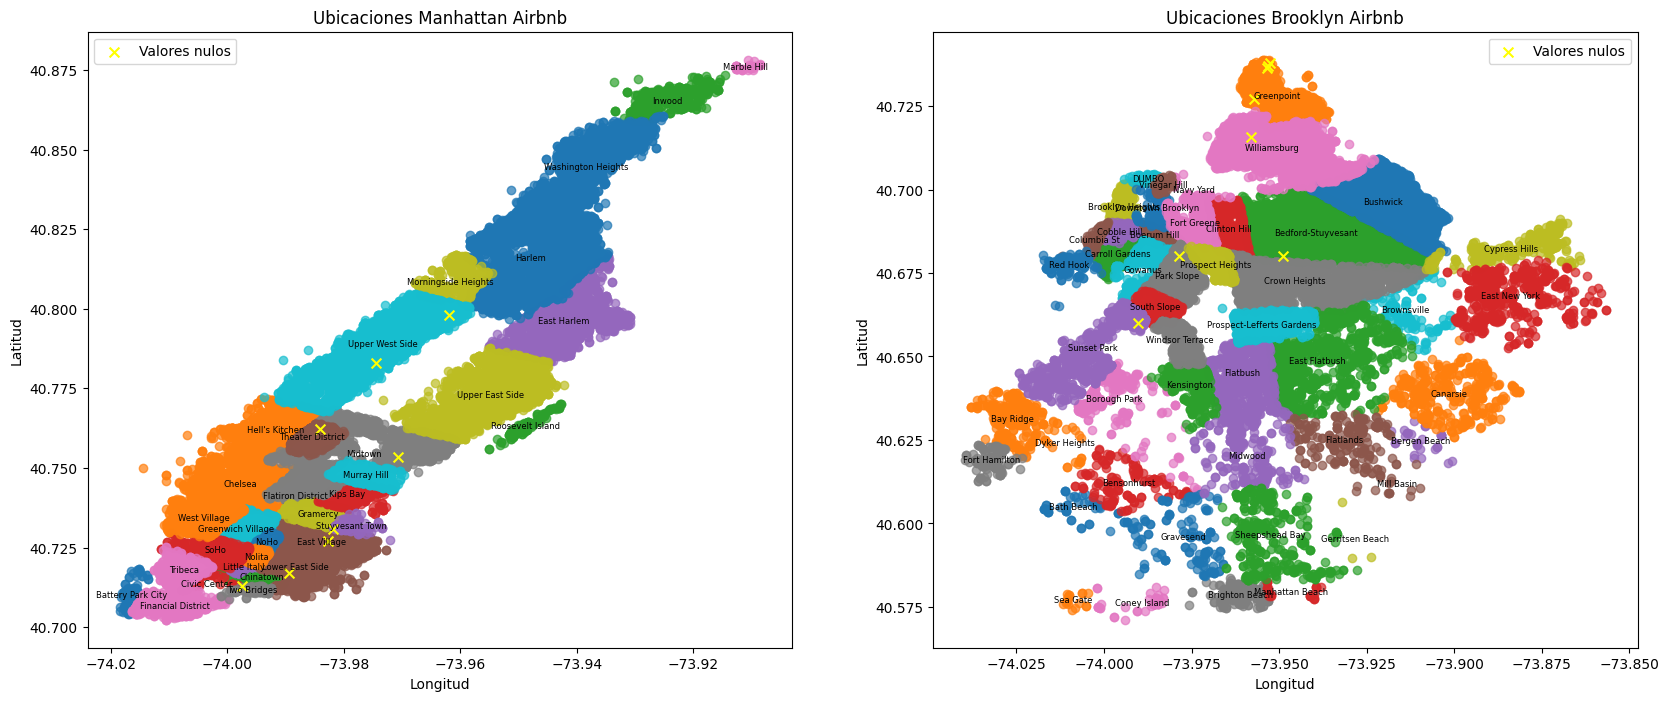

In [61]:
# Probamos a dibujar un gráfico de puntos para Manhattan y otro para Brooklyn otorgando distintos colores a cada barrio. Además mostramos los valores nulos

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Creamos varios subset para el gráfico de Manhattan
manhattan_data = airbnb[airbnb['neighbourhood group'] == 'Manhattan'] # Para los puntos del gráfico
manhattan_stats = neighbourhood_stats[neighbourhood_stats['group'] == 'Manhattan'] # Para el nombre de los neighbourhood
n_nan_man = manhattan_data[manhattan_data['neighbourhood'].isnull()] # Para los valores nulos

# Dibujamos los puntos de Manhattan
for neighbourhood, data in manhattan_data.groupby('neighbourhood'):
    axes[0].scatter(data['long'], data['lat'], alpha=0.7)
axes[0].set_title('Ubicaciones Manhattan Airbnb')
axes[0].set_xlabel('Longitud')
axes[0].set_ylabel('Latitud')

# Escribimos el nombre de cada barrio en el punto medio de cada barrio
for neighborhood, row in manhattan_stats.iterrows():
    axes[0].text(row['avg_long'], row['avg_lat'], neighborhood, ha='center', va='center', size=6)

# Dibujamos los puntos nulos como cruces amarillas
axes[0].scatter(n_nan_man['long'], n_nan_man['lat'], marker='x', color='yellow', label='Valores nulos', s=50)
axes[0].legend()

# Idem para Brooklyn
brooklyn_data = airbnb[airbnb['neighbourhood group'] == 'Brooklyn']
brooklyn_stats = neighbourhood_stats[neighbourhood_stats['group'] == 'Brooklyn']
n_nan_bro = brooklyn_data[brooklyn_data['neighbourhood'].isnull()]


for neighbourhood, data in brooklyn_data.groupby('neighbourhood'):
    axes[1].scatter(data['long'], data['lat'], alpha=0.7)
axes[1].set_title('Ubicaciones Brooklyn Airbnb')
axes[1].set_xlabel('Longitud')
axes[1].set_ylabel('Latitud')

for neighborhood, row in brooklyn_stats.iterrows():
    axes[1].text(row['avg_long'], row['avg_lat'], neighborhood, ha='center', va='center',size=6)

axes[1].scatter(n_nan_bro['long'], n_nan_bro['lat'], marker='x', color='yellow', label='Valores nulos', s=50)
axes[1].legend()
plt.show()

Aunque no se ve tan claro como con los "neighbourhood group" creo que podríamos volver a estimar un modelo para darles un barrio a los puntos nulos.

**Normalmente los eliminaríamos

In [63]:
# Vamos a hacer una predicción por K-vecinos para predecir los valores faltantes de "neighbourhood"
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=9) # Vamos a probar con 9 vecinos

# Usamos el subset de datos no nulos como entrenamiento
barrios_nonull = airbnb[airbnb['neighbourhood'].notnull()]

X = barrios_nonull[['lat', 'long']]
y = barrios_nonull['neighbourhood']


# Implementamos 10-Fold Cross-Validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

# Mostramos el accuracy medio para evaluar el modelo con 10-Fold
print("accuracy medio de los 10-Fold:", np.mean(scores))

# Entrenamos el modelo final con todos los datos
knn_model.fit(X, y)

# Hacemos la predicción para los datos nulos y los guardamos como su valor de "neighbourhood"
pred_neighbourhoods = knn_model.predict(neighbourhood_nan[['lat', 'long']])
neighbourhood_nan['neighbourhood'] = pred_neighbourhoods

# Mostramos los valores nulos con sus predicciones:
neighbourhood_nan[["lat","long","neighbourhood","neighbourhood group"]]

accuracy medio de los 10-Fold: 0.9819569952619602


,lat,long,neighbourhood,neighbourhood group
id,,,,
1286875,40.71580,-73.95803,Williamsburg,Brooklyn
1303444,40.73089,-73.98195,East Village,Manhattan
1306758,40.71300,-73.99752,Chinatown,Manhattan
1318909,40.79816,-73.96190,Upper West Side,Manhattan
1326641,40.68012,-73.97847,Park Slope,Brooklyn
1339896,40.72709,-73.98274,East Village,Manhattan
1345971,40.75348,-73.97065,Midtown,Manhattan
1350942,40.71693,-73.98948,Lower East Side,Manhattan
1356465,40.68016,-73.94878,Bedford-Stuyvesant,Brooklyn


In [64]:
# Sustituimos los valores nulos en airbnb por las predicciones del modelo 9-NN
airbnb['neighbourhood'] = airbnb['neighbourhood'].fillna(neighbourhood_nan['neighbourhood'])
airbnb.isnull().sum().sort_values()

room type                             0
host id                               0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                  76
number of reviews                   183
Construction year                   213
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
review rate number                  319
calculated host listings count      319
minimum nights                      400
host name                           404
availability 365                    448
reviews per month                 15817
last review                       15831
dtype: int64

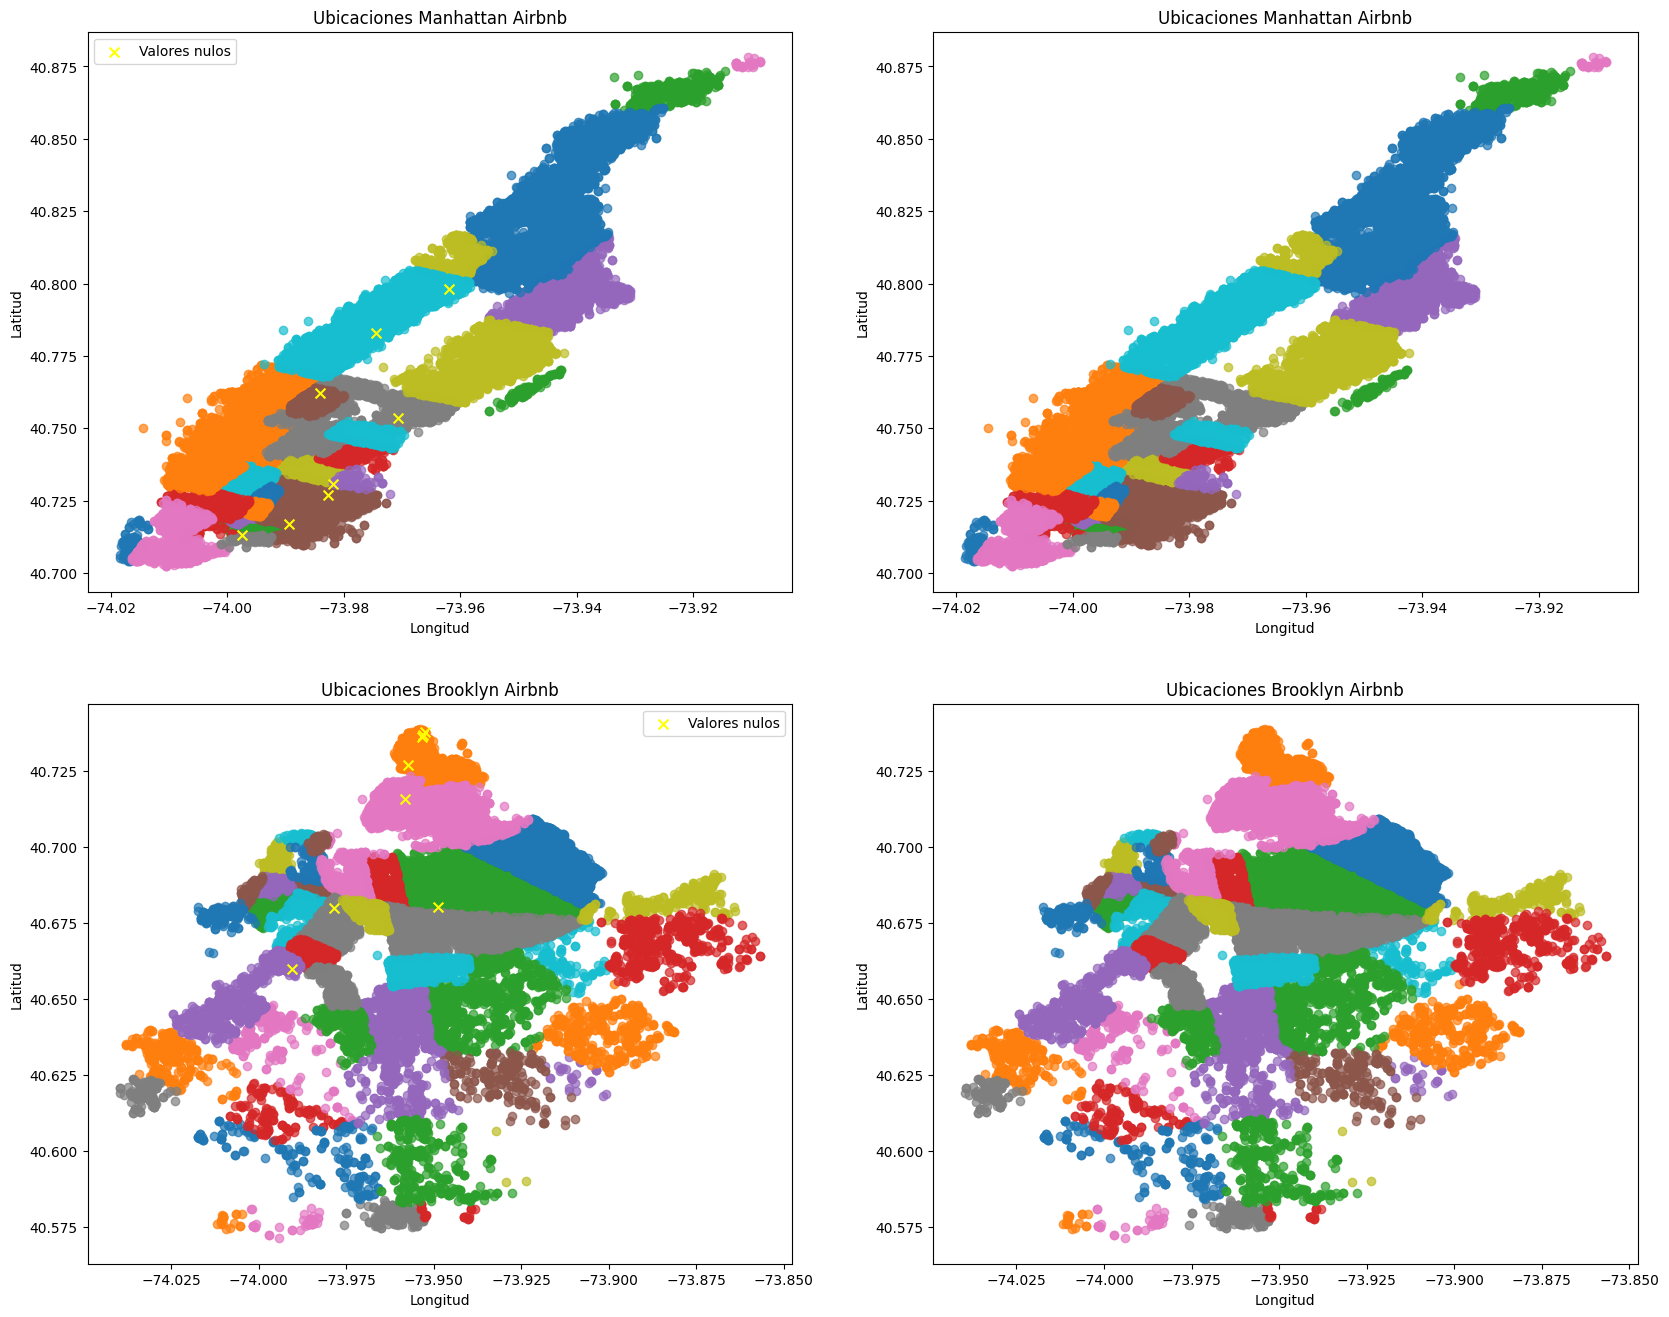

In [65]:
# Probamos a dibujar una comparativa visual para ver si parecen correctas estas asignaciones que hemos hecho previamente

fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# Creamos varios subset para el gráfico de Manhattan
manhattan_data = airbnb[airbnb['neighbourhood group'] == 'Manhattan'] # Para los puntos del gráfico
n_nan_man = neighbourhood_nan[neighbourhood_nan['neighbourhood group'] == 'Manhattan'] # Para los valores nulos

# Dibujamos los puntos de Manhattan
for i in [0,1]:
    for neighbourhood, data in manhattan_data.groupby('neighbourhood'):
        axes[0,i].scatter(data['long'], data['lat'], alpha=0.7)
    axes[0,i].set_title('Ubicaciones Manhattan Airbnb')
    axes[0,i].set_xlabel('Longitud')
    axes[0,i].set_ylabel('Latitud')


# Dibujamos los puntos nulos como cruces amarillas
axes[0,0].scatter(n_nan_man['long'], n_nan_man['lat'], marker='x', color='yellow', label='Valores nulos', s=50)
axes[0,0].legend()


# Idem para Brooklyn
brooklyn_data = airbnb[airbnb['neighbourhood group'] == 'Brooklyn']
n_nan_bro = neighbourhood_nan[neighbourhood_nan['neighbourhood group'] == 'Brooklyn']

for i in [0,1]:
    for neighbourhood, data in brooklyn_data.groupby('neighbourhood'):
        axes[1,i].scatter(data['long'], data['lat'], alpha=0.7)
    axes[1,i].set_title('Ubicaciones Brooklyn Airbnb')
    axes[1,i].set_xlabel('Longitud')
    axes[1,i].set_ylabel('Latitud')

axes[1,0].scatter(n_nan_bro['long'], n_nan_bro['lat'], marker='x', color='yellow', label='Valores nulos', s=50)
axes[1,0].legend()

plt.show()

Podemos observar como no hay diferencia visual donde antes había valores nulos que nos haga indicar que nos hayamos podido equivocar al predecir los "neighbourhood"

In [67]:
# Respecto a la cancellation_policy vemos que parece seguir una misma proporción tanto por neighbourhood groups como en general
print(airbnb['cancellation_policy'].value_counts())

airbnb.groupby('neighbourhood group', observed = True)['cancellation_policy'].value_counts()

cancellation_policy
moderate    34162
strict      33924
flexible    33888
Name: count, dtype: int64


neighbourhood group  cancellation_policy
Bronx                flexible                 910
                     moderate                 895
                     strict                   889
Brooklyn             moderate               13968
                     strict                 13917
                     flexible               13713
Manhattan            flexible               14643
                     moderate               14535
                     strict                 14366
Queens               strict                  4445
                     moderate                4427
                     flexible                4318
Staten Island        moderate                 337
                     strict                   307
                     flexible                 304
Name: count, dtype: int64

In [68]:
# Eliminamos las instancias de cancellation_policy nulas asociandolas a un nuevo df 
airbnb2=airbnb.dropna(subset=['cancellation_policy'])
airbnb2.isnull().sum().sort_values()

room type                             0
host id                               0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
number of reviews                   183
Construction year                   204
price                               242
NAME                                245
service fee                         273
host_identity_verified              286
review rate number                  319
calculated host listings count      319
minimum nights                      400
host name                           403
availability 365                    441
reviews per month                 15811
last review                       15822
dtype: int64

<Axes: xlabel='long', ylabel='lat'>

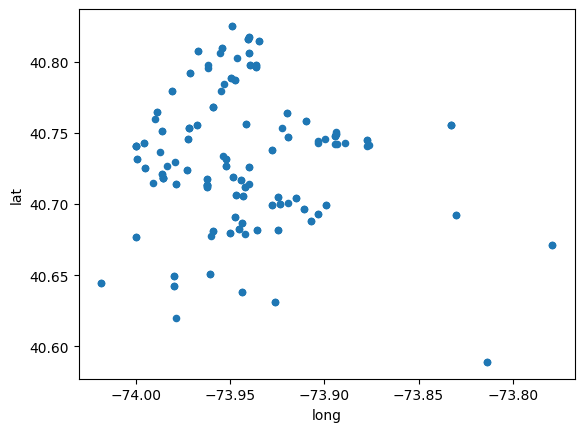

In [69]:
# Representamos las number of reviews que son nulas por si estuvieran concentradas en alguna zona en concreto
airbnb2[airbnb2['number of reviews'].isnull()].plot('long','lat',kind='scatter')

In [70]:
# Vemos que existen discordancias al no disponer del numero de reviews pero sí tener fecha de la última review
airbnb2[['number of reviews','last review']][airbnb2['last review'].notnull()&airbnb2['number of reviews'].isnull()]

,number of reviews,last review
id,,
1054909,NaN,7/7/2019
1313938,NaN,7/1/2019
1590088,NaN,9/30/2018
1880045,NaN,9/18/2018
2183810,NaN,6/21/2019
2740529,NaN,7/2/2019
3674468,NaN,4/5/2019
4661428,NaN,3/28/2019
4924875,NaN,3/5/2015


In [71]:
# Eliminamos las instancias de number of reviews nulas 
airbnb2.dropna(subset=['number of reviews'],inplace=True)
airbnb2.isnull().sum().sort_values()

C:\Users\v-gut\AppData\Local\Temp\ipykernel_24504\2850575729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb2.dropna(subset=['number of reviews'],inplace=True)


room type                             0
host id                               0
number of reviews                     0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
Construction year                   203
price                               242
NAME                                244
service fee                         273
host_identity_verified              286
review rate number                  318
calculated host listings count      319
availability 365                    387
minimum nights                      398
host name                           403
reviews per month                 15688
last review                       15698
dtype: int64

In [72]:
# Vemos el porcentaje que representan los valores nulos de de "Construction year" por "neighbourhood group" respecto al total
const_null = airbnb2['neighbourhood group'][airbnb2['Construction year'].isnull()].value_counts()
const_tot = airbnb2.groupby('neighbourhood group',observed = True).size()

const_null/const_tot*100

neighbourhood group
Bronx            0.111359
Brooklyn         0.228761
Manhattan        0.207039
Queens           0.106456
Staten Island    0.105485
dtype: float64

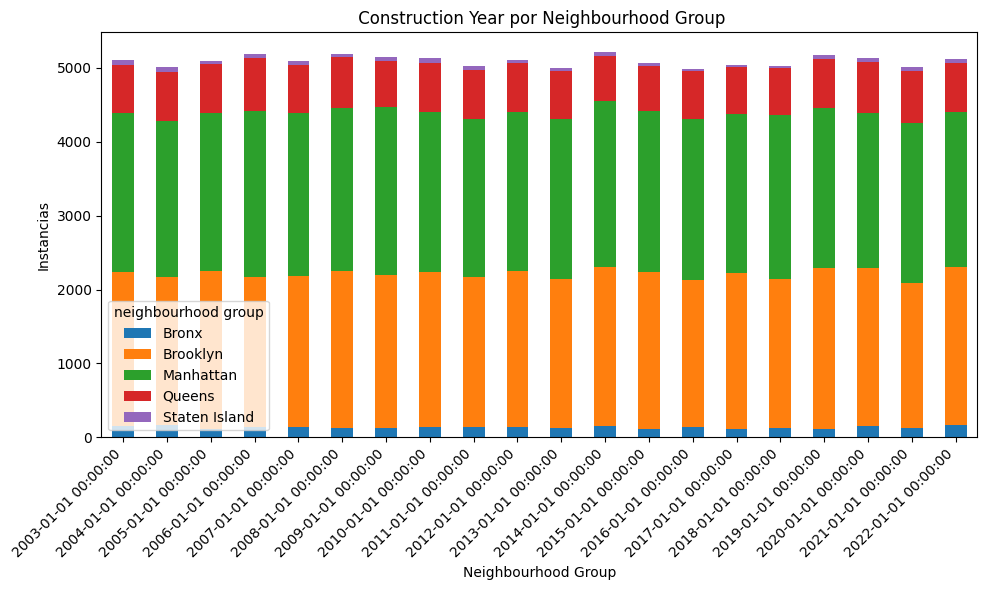

In [73]:
# Vamos a mostrar en gráficas de barras apiladas la cantidad de instancias por "neighbourhood group" y sus años de construccion
group_const = airbnb.groupby(['Construction year','neighbourhood group'],observed=True).size().unstack()

group_const.plot(kind='bar', stacked=True, figsize=(10, 6))
group_const.sort_index(axis=1)

plt.title(' Construction Year por Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Instancias')
plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

In [74]:
# Como los valores nulos no son representativos (aprox un 0.15 % de cada grupo) los eliminamos del dataset
airbnb2.dropna(subset=['Construction year'],inplace=True)
airbnb2.rename(columns={'Construction year': 'construction_year'},inplace=True)
airbnb2.isnull().sum().sort_values()

C:\Users\v-gut\AppData\Local\Temp\ipykernel_24504\3795661437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb2.dropna(subset=['Construction year'],inplace=True)
C:\Users\v-gut\AppData\Local\Temp\ipykernel_24504\3795661437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb2.rename(columns={'Construction year': 'construction_year'},inplace=True)


room type                             0
host id                               0
number of reviews                     0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
instant_bookable                      0
cancellation_policy                   0
construction_year                     0
price                               238
NAME                                239
service fee                         267
host_identity_verified              272
review rate number                  310
calculated host listings count      316
availability 365                    370
minimum nights                      386
host name                           399
reviews per month                 15665
last review                       15670
dtype: int64

De paso hemos renombrado "Construction year" para no tener variables con letras en mayúsculas innecesariamente

In [76]:
# Mostramos las columnas "NaME" y "host name" 
airbnb2[['NAME','host name']].head(10)

,NAME,host name
id,,
1001254,Clean & quiet apt home by the park,Madaline
1002102,Skylit Midtown Castle,Jenna
1002403,THE VILLAGE OF HARLEM....NEW YORK !,Elise
1002755,NaN,Garry
1003689,Entire Apt: Spacious Studio/Loft by central park,Lyndon
1004098,Large Cozy 1 BR Apartment In Midtown East,Michelle
1004650,BlissArtsSpace!,Alberta
1005202,BlissArtsSpace!,Emma
1005754,Large Furnished Room Near B'way,Evelyn


A mi parecer, carecen de utilidad, por lo tanto las eliminaré de airbnb2 pero crearé otro dataframe que contenga esas columnas sin valores nulos

In [78]:
airbnb_full = airbnb2.dropna(subset=['NAME','host name'])

airbnb2 = airbnb2.drop(columns=['NAME','host name'],axis=1)

In [79]:
# Mostramos la suma de valores nulos de ambos dataframes en la misma tabla
pd.concat([airbnb_full.isnull().sum().sort_values(),airbnb2.isnull().sum().sort_values()],axis=1,keys=['airbnb_full','airbnb2'])

,airbnb_full,airbnb2
NAME,0,NaN
number of reviews,0,0.0
construction_year,0,0.0
cancellation_policy,0,0.0
instant_bookable,0,0.0
long,0,0.0
room type,0,0.0
neighbourhood,0,0.0
neighbourhood group,0,0.0
host name,0,NaN


In [80]:
# Observamos algunas de las columnas que quedan para ver si pueden servir
airbnb2[['host_identity_verified',"review rate number","calculated host listings count","availability 365","minimum nights"]]

,host_identity_verified,review rate number,calculated host listings count,availability 365,minimum nights
id,,,,,
1001254,unconfirmed,4.0,6.0,286.0,10.0
1002102,verified,4.0,2.0,228.0,30.0
1002403,NaN,5.0,1.0,352.0,3.0
1002755,unconfirmed,4.0,1.0,322.0,30.0
1003689,verified,3.0,1.0,289.0,10.0
...,...,...,...,...,...
57361894,unconfirmed,4.0,1.0,0.0,7.0
57362446,verified,3.0,1.0,31.0,3.0
57362999,verified,2.0,2.0,0.0,1.0


In [81]:
# Eliminamos los valores nulos de estas columnas en airbnb_full ya que nos pueden servir para estimaciones y eliminamos las columnas de airbnb2
airbnb_full=airbnb_full.dropna(subset=['host_identity_verified',"review rate number","calculated host listings count","availability 365","minimum nights"])

airbnb2 = airbnb2.drop(columns=['host_identity_verified',"review rate number","calculated host listings count","availability 365","minimum nights"],axis=1)

pd.concat([airbnb_full.isnull().sum().sort_values(),airbnb2.isnull().sum().sort_values()],axis=1,keys=['airbnb_full','airbnb2'])

,airbnb_full,airbnb2
NAME,0,NaN
review rate number,0,NaN
number of reviews,0,0.0
minimum nights,0,NaN
construction_year,0,0.0
calculated host listings count,0,NaN
cancellation_policy,0,0.0
instant_bookable,0,0.0
room type,0,0.0
lat,0,0.0


In [82]:
# Observamos cuantas instancias tienen el precio o el service fee nulos
airbnb2[airbnb2['price'].isnull() | airbnb2['service fee'].isnull()].count()

host id                471
neighbourhood group    471
neighbourhood          471
lat                    471
long                   471
instant_bookable       471
cancellation_policy    471
room type              471
construction_year      471
price                  233
service fee            204
number of reviews      471
last review            423
reviews per month      422
dtype: int64

Los valores nulos podrían interesar para predecir precios o service fee posteriormente, así que los guardaremos en otro dataframe

In [84]:
#Usaremos airbnb_full que es el dataset más restrictivo en cuanto a instancias
prices_null = airbnb_full[airbnb_full['price'].isnull() | airbnb_full['service fee'].isnull()]
prices_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 458 entries, 1009621 to 57367417
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NAME                            458 non-null    object        
 1   host id                         458 non-null    int64         
 2   host_identity_verified          458 non-null    category      
 3   host name                       458 non-null    object        
 4   neighbourhood group             458 non-null    category      
 5   neighbourhood                   458 non-null    object        
 6   lat                             458 non-null    float64       
 7   long                            458 non-null    float64       
 8   instant_bookable                458 non-null    bool          
 9   cancellation_policy             458 non-null    category      
 10  room type                       458 non-null    category      
 11  

In [85]:
# Eliminamos los valores nulos de ambas en airbnb2 y airbnb_full
airbnb_full = airbnb_full.dropna(subset=["price","service fee"])

airbnb2 = airbnb2.dropna(subset=["price","service fee"])
pd.concat([airbnb_full.isnull().sum().sort_values(),airbnb2.isnull().sum().sort_values()],axis=1,keys=['airbnb_full','airbnb2'])

,airbnb_full,airbnb2
NAME,0,NaN
review rate number,0,NaN
number of reviews,0,0.0
minimum nights,0,NaN
service fee,0,0.0
price,0,0.0
construction_year,0,0.0
calculated host listings count,0,NaN
cancellation_policy,0,0.0
room type,0,0.0


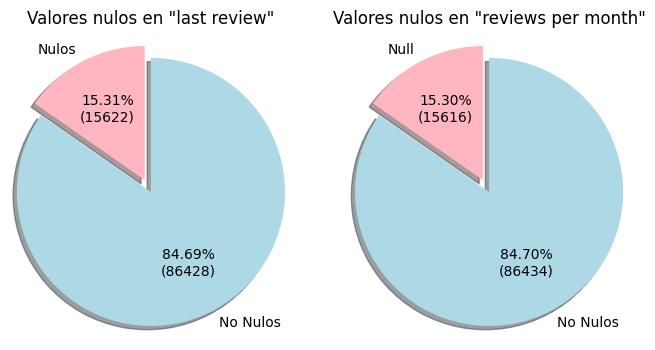

In [86]:
# Comparamos el porcentaje de datos nulos de last review y reviews per month respecto al total en dos gráficas de tartas (Respecto a airbnb2):

null_lr = airbnb2['last review'].isnull().sum()
null_rpm = airbnb2['reviews per month'].isnull().sum()
por_null_lr = (null_lr / len(airbnb)) * 100
por_null_rpm = (null_rpm / len(airbnb)) * 100

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
colors = ['LightPink', 'LightBlue']
explode = (0.1, 0)

# Gráfica derecha
axes[0].pie([por_null_lr, 100 - por_null_lr], explode=explode, labels=['Nulos', 'No Nulos'], autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * len(airbnb) / 100),
            shadow=True, startangle=90, colors=colors)
axes[0].set_title('Valores nulos en "last review"')

# Gráfica izquierda
axes[1].pie([por_null_rpm, 100 - por_null_rpm], explode=explode, labels=['Null', 'No Nulos'], autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * len(airbnb) / 100),
            shadow=True, startangle=90, colors=colors)
axes[1].set_title('Valores nulos en "reviews per month"')

axes[0].axis('equal')
axes[1].axis('equal')
plt.show()

Vemos que hay una alta proporción de datos nulos respecto al total de la muestra

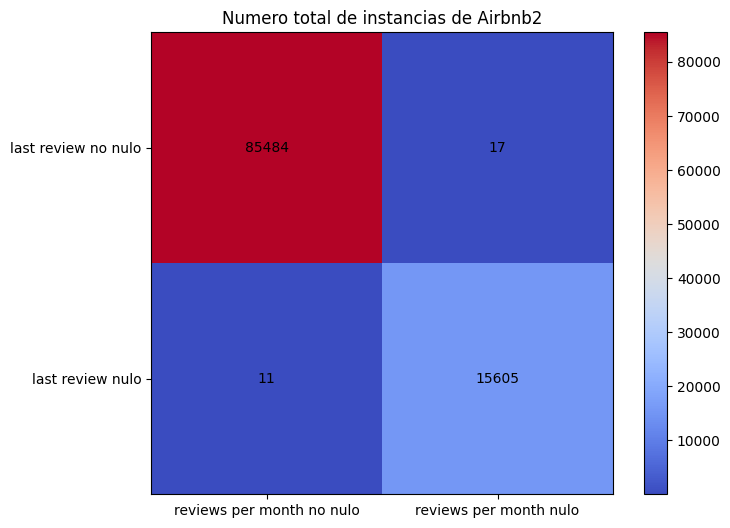

In [88]:
# Creamos una matriz para ver la cantidad de instancias en la muestra si last review o review per month son nulos o no.

a = airbnb2['last review'][airbnb2['reviews per month'].notnull()].notnull().sum()
b = airbnb2['last review'][airbnb2['reviews per month'].notnull()].isnull().sum()
c = airbnb2['last review'][airbnb2['reviews per month'].isnull()].notnull().sum()
d = airbnb2['last review'][airbnb2['reviews per month'].isnull()].isnull().sum()

matriz = np.array([[a, b], [c, d]])

# Dibujamos la matriz
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(matriz, cmap='coolwarm') 

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, matriz[i, j], ha="center", va="center", color="black")

ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['reviews per month no nulo', 'reviews per month nulo'])
ax.set_yticklabels(['last review no nulo', 'last review nulo'])
ax.set_title('Numero total de instancias de Airbnb2')

# La barra de colores de la derecha
cbar = ax.figure.colorbar(im, ax=ax)

plt.show()

Vemos que prácticamente coinciden las instancias con valores nulos de ambas columnas y debido a la cantidad de instancias que tienen vamos a conservarlas pero crearemos dataset adicionales donde limpiemos los nulos.

In [90]:
# Creamos los dataset sin nulos y mostramos una tabla final de los 4 datasets
airbnb_nn = airbnb2.dropna(subset=["last review","reviews per month"])
airbnb_fullnn = airbnb_full.dropna(subset=["last review","reviews per month"])

pd.concat([airbnb_full.isnull().sum().sort_values()
           ,airbnb2.isnull().sum().sort_values()
           ,airbnb_fullnn.isnull().sum().sort_values()
           ,airbnb_nn.isnull().sum().sort_values()],axis=1,keys=['airbnb_full','airbnb2','airbnb_fullnn','airbnb_nn'])

,airbnb_full,airbnb2,airbnb_fullnn,airbnb_nn
NAME,0,NaN,0,NaN
review rate number,0,NaN,0,NaN
number of reviews,0,0.0,0,0.0
minimum nights,0,NaN,0,NaN
service fee,0,0.0,0,0.0
price,0,0.0,0,0.0
construction_year,0,0.0,0,0.0
calculated host listings count,0,NaN,0,NaN
cancellation_policy,0,0.0,0,0.0
room type,0,0.0,0,0.0


## Visualizaciones extras

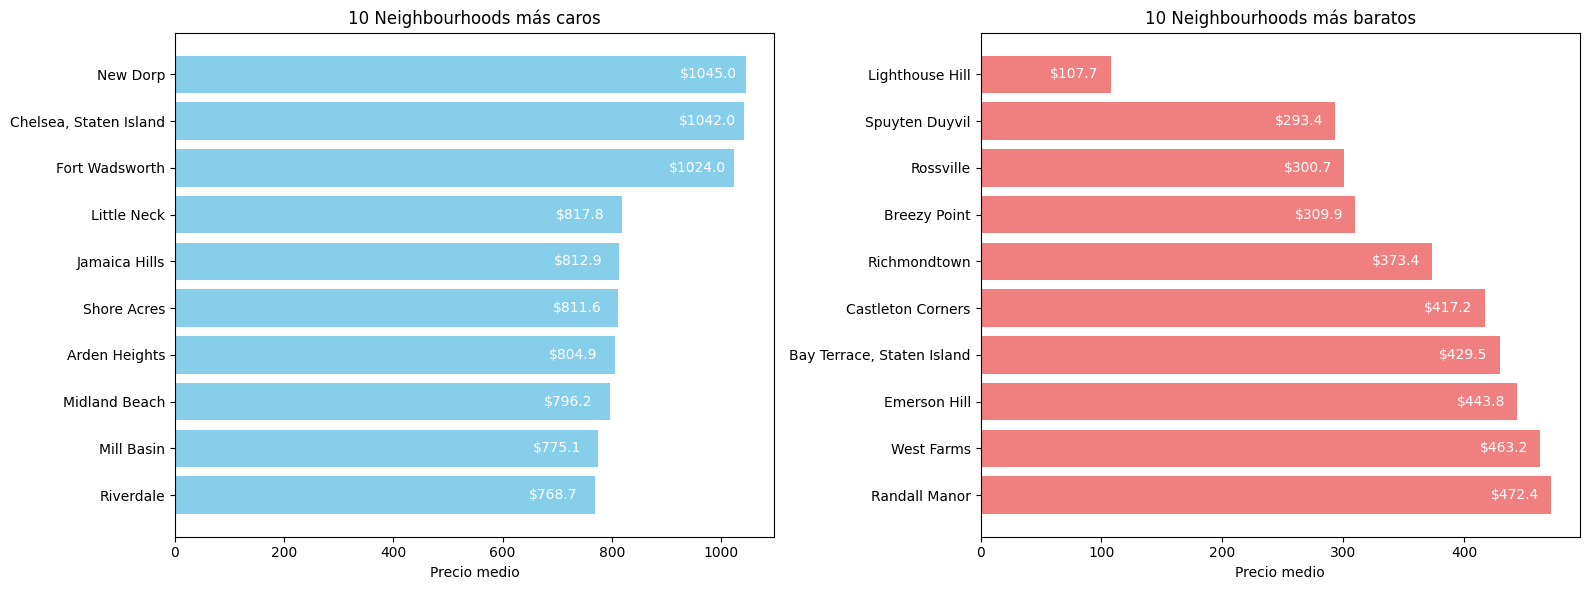

In [92]:
# Vemos los 10 barrios más caros y los 10 más baratos
avg_price = airbnb2.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
top_10 = avg_price.head(10)
bot_10 = avg_price.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 10 más caros
axes[0].barh(top_10.index, top_10.values, color='skyblue')
axes[0].set_title('10 Neighbourhoods más caros')
axes[0].set_xlabel('Precio medio')
axes[0].invert_yaxis()  # Invertimos el eje para que salgan los más caros primero
# Añadimos el precio dentro de las barras
for i, v in enumerate(top_10.values):
  axes[0].text(v - 120, i, f"${v:.1f}", color='white', va='center')
    
# 10 más baratos
axes[1].barh(bot_10.index, bot_10.values, color='lightcoral')
axes[1].set_title('10 Neighbourhoods más baratos')
axes[1].set_xlabel('Precio medio')
for i, v in enumerate(bot_10.values):
  axes[1].text(v - 50, i, f"${v:.1f}", color='white', va='center')

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

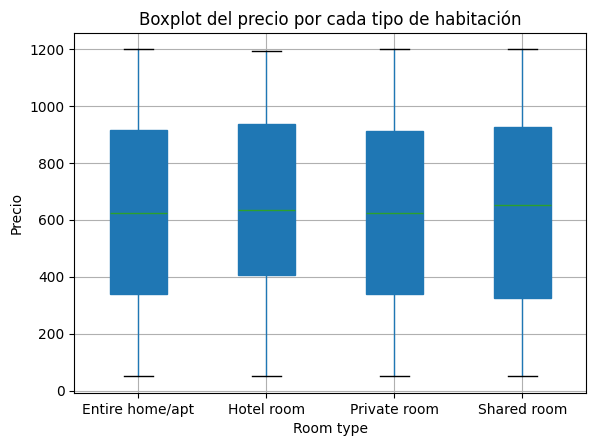

In [93]:
# Vemos el precio medio por cada tipo de habitación
plt.figure(figsize=(12, 6))
airbnb2.boxplot(column='price', by='room type', patch_artist=True)
plt.title('Boxplot del precio por cada tipo de habitación')
plt.suptitle('')  # Eliminamos el subtitulo por defecto
plt.ylabel('Precio')
plt.xlabel('Room type')
plt.show()

<Figure size 1200x600 with 0 Axes>

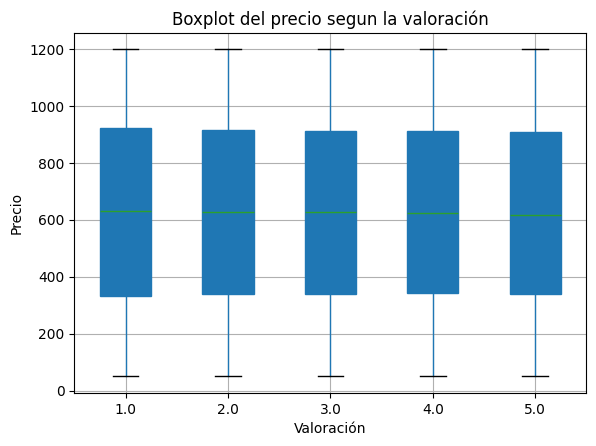

In [94]:
# Vemos el precio medio por valoración
plt.figure(figsize=(12, 6))
airbnb_full.boxplot(column='price', by='review rate number', patch_artist=True)
plt.title('Boxplot del precio segun la valoración')
plt.suptitle('')  # Eliminamos el subtitulo por defecto
plt.ylabel('Precio')
plt.xlabel('Valoración')
plt.show()

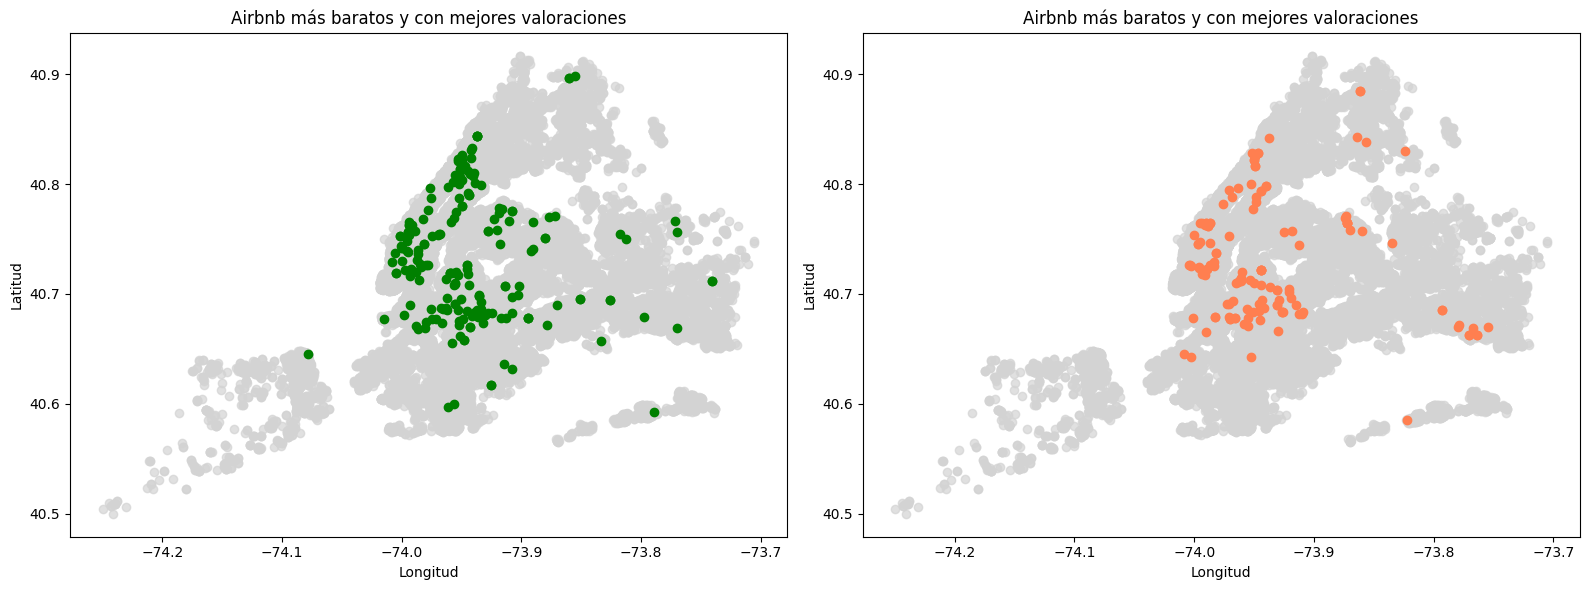

In [95]:
# Dibujamos las ubicaciones de los airbnb con máxima valoración, al menos 150 reviews y de menos de 400 dólares.
# También dibujamos las ubicaciones con máxima valoración , al menos 150 reviews y de más de 1000 dólares

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

best_air = airbnb_full[(airbnb_full['review rate number'] == 5) & (airbnb_full['number of reviews'] >= 150) & (airbnb_full['price'] <= 400)]
axes[0].scatter(airbnb2['long'], airbnb2['lat'], color = 'lightgray', alpha=0.7) # Mapa de NY gris para visualizarse mejor
axes[0].scatter(best_air['long'], best_air['lat'],color = 'green')

axes[0].set_title('Airbnb más baratos y con mejores valoraciones')
axes[0].set_xlabel('Longitud')
axes[0].set_ylabel('Latitud')

caro_air = airbnb_full[(airbnb_full['review rate number'] == 5) & (airbnb_full['number of reviews'] >= 150) & (airbnb_full['price'] > 1000)]
axes[1].scatter(airbnb2['long'], airbnb2['lat'], color = 'lightgray', alpha=0.7) # Mapa de NY gris para visualizarse mejor
axes[1].scatter(caro_air['long'], caro_air['lat'],color = 'coral')

axes[1].set_title('Airbnb más baratos y con mejores valoraciones')
axes[1].set_xlabel('Longitud')
axes[1].set_ylabel('Latitud')

plt.tight_layout()
plt.show()

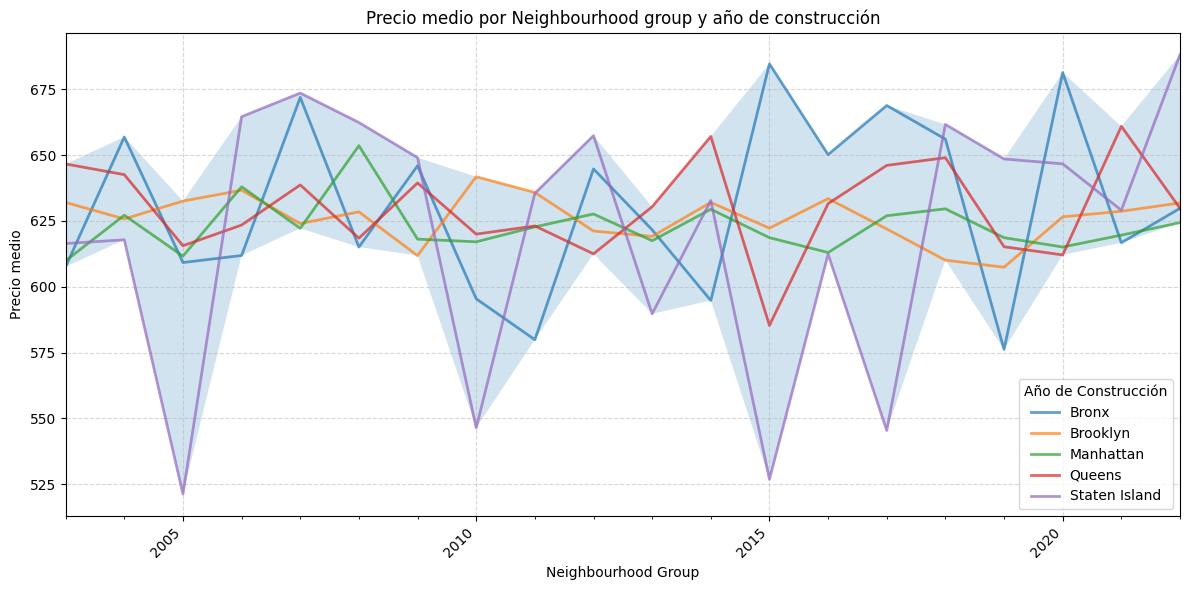

In [96]:
# Vemos la evolución del precio medio de cada "neighbourhood group" según el año de construcción
avg_p_ng = airbnb_full.groupby(['construction_year', 'neighbourhood group'],observed = True)['price'].mean().unstack()

avg_p_ng.plot(kind='line', figsize=(12, 6), linewidth=2, alpha=0.7)
plt.fill_between(avg_p_ng.index, avg_p_ng.min(axis=1), avg_p_ng.max(axis=1), alpha=0.2) # Sombreamos los valores máximos y mínimos

# Customize the plot
plt.title('Precio medio por Neighbourhood group y año de construcción')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Precio medio')
plt.legend(title='Año de Construcción')
plt.xticks(rotation=45, ha='right')  
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Se podrían estimar precios usando airbnb_fullnn

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preparamos los datos
X = airbnb_nn.drop(['price','last review','neighbourhood'], axis=1)
y = airbnb_nn['price']

# Transformamos variables categoricas en dummies
X = pd.get_dummies(X, columns=['neighbourhood group', 'room type','cancellation_policy','construction_year'])

# Dividimos el Train y Test al 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos el modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train)

# Hacemos predicciones del modelo 
y_pred = rf_model.predict(X_test)

# Evaluamos el modelo en el test
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = rf_model.score(X_test, y_test)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2:{r2}")

MSE: 1.4969213955664735
RMSE: 1.2234873908489918
R2:0.9999862686864018


Observamos que el modelo es bastante bueno al predecir el precio con un R2 del 99.99 %

In [123]:
# Predecimos los valores que tenian prices nulos:
X_2 = prices_null[airbnb_nn.columns]
X_2 = X_2.drop(['price','last review','neighbourhood'], axis=1)
X_2 = pd.get_dummies(X_2, columns=['neighbourhood group', 'room type' ,'cancellation_policy' ,'construction_year'])
y_pred2 = rf_model.predict(X_2)

# Asociamos las predicciones a prices_null como su precio
prices_null['price'] = y_pred2
prices_null.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,...,construction_year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
id,,,,,,,,,,,,,,,,,,,,,
1009621,West Village Nest - Superhost,46551725984,verified,Daniel,Manhattan,West Village,40.73530,-74.00525,True,flexible,...,2018-01-01,601.20,NaN,90.0,27.0,10/31/2018,0.22,3.0,1.0,100.0
1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,True,moderate,...,2009-01-01,601.05,NaN,2.0,148.0,6/29/2019,1.20,3.0,1.0,197.0
1010725,Perfect for Your Parents + Garden,80380130347,verified,Ryan,Brooklyn,Fort Greene,40.69169,-73.97185,True,flexible,...,2006-01-01,601.21,NaN,2.0,198.0,6/28/2019,1.72,5.0,1.0,96.0
1011277,Chelsea Perfect,73862528370,verified,Alberta,Manhattan,Chelsea,40.74192,-73.99501,True,moderate,...,2008-01-01,601.33,NaN,1.0,260.0,7/1/2019,2.12,3.0,1.0,325.0
1082524,Retreat in Williamsburg,22731046418,verified,Abraham,Brooklyn,Williamsburg,40.71492,-73.95935,True,strict,...,2007-01-01,319.87,64.0,4.0,240.0,6/17/2019,2.19,3.0,1.0,337.0
